# Import Libraries

In [91]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [92]:
data = sns.load_dataset('penguins')
df = pd.DataFrame(data)

In [93]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Data Cleaning / Data Preprocessing

In [94]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [95]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [96]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [97]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean() , axis=0)
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_length_mm'].mean() , axis=0)
df['body_mass_g'] = df['body_mass_g'].fillna(df['bill_length_mm'].mean() , axis=0)

In [98]:
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['bill_length_mm'].mean() , axis=0)

In [99]:
df.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [101]:
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# View the first few rows to see the encoded column
print(df[['species', 'species_encoded']].head())

  species  species_encoded
0  Adelie                0
1  Adelie                0
2  Adelie                0
3  Adelie                0
4  Adelie                0


In [102]:
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# View the first few rows to see the encoded column
print(df[['sex', 'sex_encoded']].head())

      sex  sex_encoded
0    Male            1
1  Female            0
2  Female            0
3     NaN            2
4  Female            0


# Determine Features and Target

In [103]:
x = df.drop(['species' , 'island' , 'sex'] , axis=1)
y = df['species']

# Split Tarin and Test

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply Logistic Regression With Hyperparameters

LogisticRegression(C=0.1, max_iter=10, multi_class='ovr') {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2'} 0.6763636363636364
194    Chinstrap
157    Chinstrap
225       Gentoo
208    Chinstrap
318       Gentoo
         ...    
321       Gentoo
172    Chinstrap
73        Adelie
76        Adelie
16        Adelie
Name: species, Length: 69, dtype: object   ['Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie']
accuracy:

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

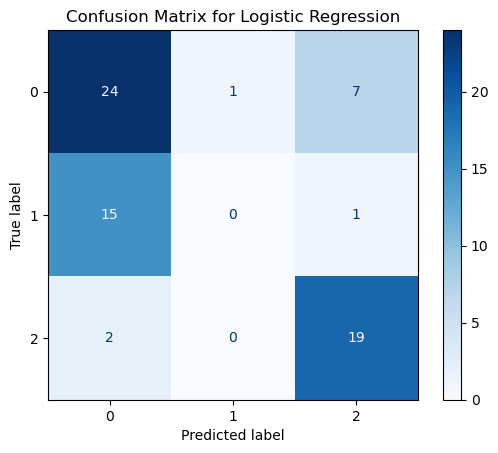

In [164]:
logistic = LogisticRegression(max_iter=10)
parameters = {'C':[0.1 , 1], 
             'penalty':['l1' , 'l2' , 'none'],
             'multi_class':['multinomial' , 'ovr']}
grid_search = GridSearchCV(estimator=logistic, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_ , grid_search.best_params_ , grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print(y_test , " " , y_pred)
log_acc = accuracy_score(y_test, y_pred)
print("accuracy:-" , accuracy_score(y_test, y_pred))
print("recall:-" , recall_score(y_test, y_pred , average='macro'))
print( "confusion matrix", confusion_matrix(y_test, y_pred))
print("f1 score:-", f1_score(y_test, y_pred , average='macro'))
print("cross validation", cv_score)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Apply Support Vector Machine (SVM) with Hyperparameters

SVC(C=1, gamma=0.1, kernel='linear') {'C': 1, 'gamma': 0.1, 'kernel': 'linear'} 0.9854545454545456
194    Chinstrap
157    Chinstrap
225       Gentoo
208    Chinstrap
318       Gentoo
         ...    
321       Gentoo
172    Chinstrap
73        Adelie
76        Adelie
16        Adelie
Name: species, Length: 69, dtype: object   ['Chinstrap' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Ade

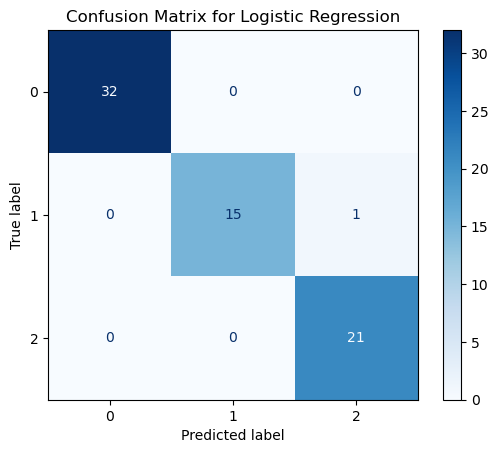

In [170]:
svm = SVC()
parameters = {'C':[0.1 , 1], 
             'kernel':['linear' , 'rbf' , 'poly'],
             'gamma':[0.1 , 0.2]}
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_ , grid_search.best_params_ , grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print(y_test , " " , y_pred)
svm_acc = accuracy_score(y_test, y_pred)
print("accuracy:-" , accuracy_score(y_test, y_pred))
print("recall:-" , recall_score(y_test, y_pred , average='macro'))
print( "confusion matrix", confusion_matrix(y_test, y_pred))
print("f1 score:-", f1_score(y_test, y_pred , average='macro'))
print("cross validation", cv_score)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Apply Decision Tree with Hyperparameters

DecisionTreeClassifier(max_depth=3, min_samples_split=0.1) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.1} 1.0
194    Chinstrap
157    Chinstrap
225       Gentoo
208    Chinstrap
318       Gentoo
         ...    
321       Gentoo
172    Chinstrap
73        Adelie
76        Adelie
16        Adelie
Name: species, Length: 69, dtype: object   ['Chinstrap' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo'

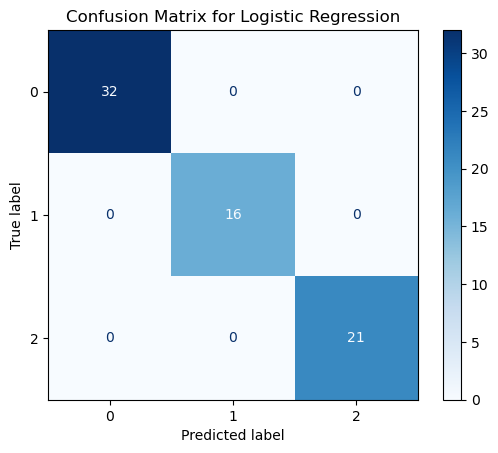

In [160]:
# Decision Tree
parameters = {'criterion':['gini' , 'entropy'], 
             'min_samples_leaf':[1 , 2],
             'min_samples_split':[0.1 , 0.2], 
             'max_depth': [3, 4]}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_ , grid_search.best_params_ , grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print(y_test , " " , y_pred)
dt_acc = accuracy_score(y_test, y_pred)
print("accuracy:-" , accuracy_score(y_test, y_pred))
print("recall:-" , recall_score(y_test, y_pred , average='macro'))
print( "confusion matrix", confusion_matrix(y_test, y_pred))
print("f1 score:-", f1_score(y_test, y_pred , average='macro'))
print("cross validation", cv_score)


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Apply Random Forest with Hyperparameters

RandomForestClassifier(max_depth=3, min_samples_split=0.1, n_estimators=10) {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'n_estimators': 10} 0.9963636363636365
194    Chinstrap
157    Chinstrap
225       Gentoo
208    Chinstrap
318       Gentoo
         ...    
321       Gentoo
172    Chinstrap
73        Adelie
76        Adelie
16        Adelie
Name: species, Length: 69, dtype: object   ['Chinstrap' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Gentoo

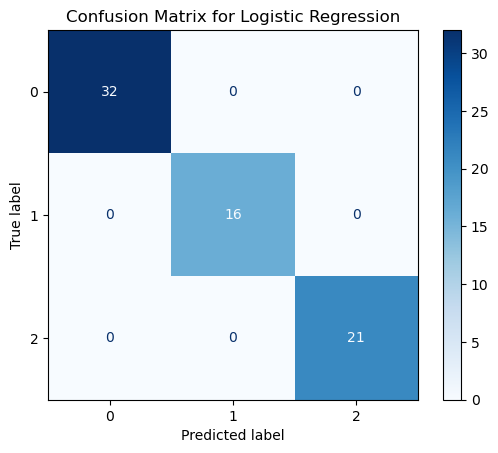

In [168]:
# Random Forest
parameters = {'n_estimators': [5, 10, 20], 
             'min_samples_leaf':[1 , 2],
             'min_samples_split':[0.1 , 0.2], 
             'max_depth': [3, 4]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_ , grid_search.best_params_ , grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print(y_test , " " , y_pred)
rf_acc = accuracy_score(y_test, y_pred)
print("accuracy:-" , accuracy_score(y_test, y_pred))
print("recall:-" , recall_score(y_test, y_pred , average='macro'))
print( "confusion matrix", confusion_matrix(y_test, y_pred))
print("f1 score:-", f1_score(y_test, y_pred , average='macro'))
print("cross validation", cv_score)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Define The Evaluation for each Model

In [166]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines'],
    'Score': [log_acc, dt_acc , rf_acc , svm_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,Support Vector Machines,0.985507
0,Logistic Regression,0.623188
